In [ ]:
'''
file is like this

line 1: runtime for neuron_gene.express() for neurons of 1/1000 networks for 1st generation
line 2: runtime for synapse_gene.express() for neurons of 1/1000 networks for 1st generation
line 3: runtime for neuron_gene.express() for neurons of 2/1000 networks for 1st generation


each chunk of 2000 lines is one generations, hold it in dictionary

'''

In [26]:
def describe(arr):
    if len(arr) == 0:
        return "Array is empty. Cannot compute statistics."
    
    stats = {
        "count": len(arr),
        "mean": np.mean(arr),
        "std": np.std(arr, ddof=1),
        "min": np.min(arr),
        "25%": np.percentile(arr, 25),
        "50%": np.median(arr),
        "75%": np.percentile(arr, 75),
        "max": np.max(arr),
    }
    
    return stats

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '/Users/so/Documents/projects/personal/2048_AI/logs/init_per_iteration.txt'
with open(path, 'r') as f:
    log_data = f.read()

# Convert log data into a list of dictionaries
lines = log_data.strip().split('\n')

path = '/Users/so/Documents/projects/personal/2048_AI/logs/2024-12-27_23-17-59.txt'
with open(path, 'r') as f:
    log_data = f.read()

# Convert log data into a list of dictionaries
lines = log_data.strip().split('\n')
data = [eval(line) for line in lines]

# Create a pandas DataFrame
df = pd.DataFrame(data)

In [17]:
neurons = {}
synapses = {}

for gen in range(130):
    neuron = []
    synapse = []
    for i, line in enumerate(lines[gen * 2000 :(gen + 1) * 2000]):
        if i % 2 == 0: # if line is neuron.express() times
            neuron.append(line)
        else:
            synapse.append(line)

    neuron = ', '.join(neuron)
    synapse = ', '.join(synapse)
    neurons[gen] = np.array(eval(neuron))
    synapses[gen] = eval(synapse)

In [31]:
des_neu = {}
des_syn = {}
for gen in neurons:
    des_neu[gen] = describe(neurons[gen])
    des_syn[gen] = describe(synapses[gen])

des_neu = pd.DataFrame(des_neu).T
des_syn = pd.DataFrame(des_syn).T

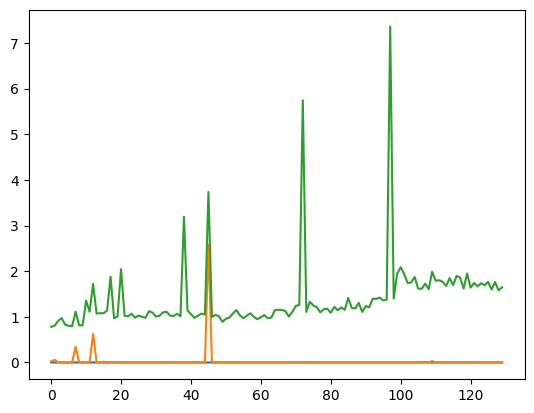

In [41]:
plt.plot(des_neu.index, des_neu['mean'])
plt.plot(des_neu.index, des_neu['max'])
plt.plot(des_neu.index, df['sim_time'])